<a href="https://colab.research.google.com/github/anhdang1/stock-correlation-analysis/blob/main/regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We use the packages numpy, pandas, matplotlib, and sci-kit learn (sklearn) in the code below.
We start by importing some of these.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl,plt

To run this project, upload the regression_example.csv file, and either choose Runtime: Run All, or run each cell one by one.
To perform your group task, see the next text cell.

Next, we import the data from a csv file. We assume the csv file has:
   - one row of headers labeling each column
   - the last column is the dependent variable y
   - the other columns are the independent variables x
   - so our regressions are exploring y as a function of x.
   - read_csv method from pandas returns a dataframe for us to work with
   - [:, :-1]  take all rows, for all except the last column
   - that gives us the X matrix
   - [:, -1] take all rows, for just the last column
   - that gives us the y column

Step 1

In [56]:
dataset = pd.read_csv('regression_example.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [57]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

The code below transforms the state column into numeric values. This is one of the standard pre-processing steps in preparing data for analysis and is very easy to do with sklearn. We specify the coding scheme used (OneHotEncoder below), we specify the column number (4th column is #3), we specify the rest of the columns are to be 'passed through' as is.
We have three values for state - ny ca and fl, and these are represented using  0 0 1, 1 0 0, 0 1 0; thus replacing state column with three numeric columns, and placing them at the start of X. 
**This is the Dummy Variables from your stat/econometrics classes, except you don't need to worry about figuring them out. sklearn will do it for you**

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [59]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In machine learning, we 'train' our algorithm on one data set, so that it can refine itself till it can predict y for given x values with confidence. The 'machine' 'learns' from data.
What we do to also test how well it performs, is to split our data set- a larger set is used for training, and then we use the smaller set for testing.
In finance, we would use the same technique for backtesting strategies with past data, before applying them to real world use.
The code below does this splitting - X and y into train and test sets. 

Step 2

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

The code below creates a linear regression object, and trains it ('fit') using the training set.  **When you try out another kind of regression or analysis, this is the part of code that will change.**  Steps 1 and 2 above will remain the same across almost all of machine learning/AI/deep learning exercises using a data set. 

Step 3

In [61]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Now we use the trained regressor object to predict y values based on the test set made from X. Then we compare the predicted values with the actual y values we have (y_test).
Before doing so, we 'reshape' them so that they become columns instead of rows.
We combine the two columns into parallel columns (concatenate) so that we can plot and print them side by side.
Note this code can remain the same, so long as the 'regressor' variable is available from the previous step.

Step 4

[[103015.20159795 103282.38      ]
 [132582.27760816 144259.4       ]
 [132447.73845175 146121.95      ]
 [ 71976.09851258  77798.83      ]
 [178537.48221057 191050.39      ]
 [116161.24230167 105008.31      ]
 [ 67851.69209676  81229.06      ]
 [ 98791.73374687  97483.56      ]
 [113969.43533014 110352.25      ]
 [167921.06569552 166187.94      ]]


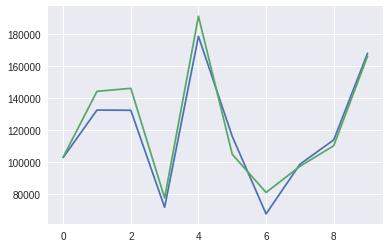

In [62]:
y_pred = regressor.predict(X_test)

y1 = y_pred.reshape(len(y_pred),1)
y2 = y_test.reshape(len(y_test), 1)
plt.plot(np.concatenate((y1,y2),1))
print(np.concatenate((y1,y2), 1))

In [51]:
print(y_pred)

[17.35066048  8.03832305 29.26194621 25.72817783 30.72335281 27.95462246
 27.90014833 33.99967343 29.47991523 28.3861432   6.9352479  35.02058918
 11.72069089 35.19858067 35.68323703 26.68958949  9.39878242 27.79307034
 16.04505314 12.23842627 13.16699664 30.88490493  9.44810052 32.24670281
  5.71990129 15.2067435  13.0767359  14.49249262  9.07567818 32.73135917
 13.27116676 14.36590388 35.37657216 14.20435176 28.07813982 36.89185309
 14.16938838 37.21495733 18.52871401  9.73394912 11.41402602 32.21382407
 15.77933089 31.14359021 24.09738159 25.10982259  9.72188666 13.1341179
 28.29416607 32.60978459 30.86846557 12.77007103 34.03576987 17.69020409
 37.05340521  7.86033156 22.64628807 30.82048597 32.52048894 16.28042662
 17.33422112 12.25486564 31.03001769  8.52297941 12.07687415 11.20107114
 32.1973847  10.53822301 26.85114161 32.35893682 31.06289642  9.5767739
 28.53125595 18.7067055  12.30971765 30.98203809 31.22444854 32.68204106
 31.38600066 15.06163075 33.89125693 28.13261395 11.0

In [63]:
print(y_test)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


For a specific set of x values, we ask the regressor to predict the y value. 
If you were adapting this code, you will supply your own values, and you should be careful about two things:
 -**the double square brackets**
 -**and, the values you provide must match the x columns in your data set.**

Step 5

In [64]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92389386]


We would like to see the coefficients and intercept of the y = f(x) + k relationship. If we had three x variables x1, x2, x3,   y = ax1 + bx2 + cx3 + k   would have a,b,c as coefficients, and k as the intercept.
The code below shows how to get these values printed out.

Step 6

In [65]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
42467.52924853204


We can use the r-squared value as a measure of how good our regression is. Note the code below does not depend on anything we did earlier. You can compute the r-squared for any two lists using this code, and nothing needs to be changed here.

Step 7

In [66]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9347068473282515

Next, we do a polynomial regression on the same data set. We already have the data set, the only changes happen with the step 3 above (creating a regressor, and fitting it).And that step involves more actions with this kind of regression. In particular, note that X needs to be transformed into X_poly before both training the regressor, and later, before predicting.

Step 8

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

Step 9

In [68]:
y_pred = regressor.predict(poly_reg.transform(X_test))

Step 10

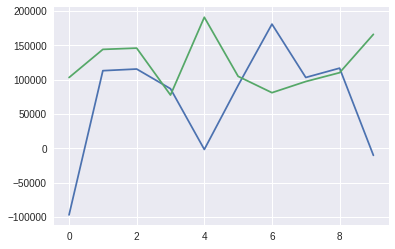

In [69]:
y1 = y_pred.reshape(len(y_pred),1)
y2 = y_test.reshape(len(y_test), 1)
plt.plot(np.concatenate((y1,y2),1))


Step 11

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-8.402979412782871

Question: Which regression works better for this data set?

Answer: The Polynomial Regression